In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Реализации методов

In [ ]:
# метод дихотомии
def dichotomy_method(eps, f, a, b):
  left = a
  right = b
  number_of_iterations = 0
  number_of_function_counting = 0
  while abs(right - left) > eps:
    x1 = (left + right) / 2 - eps/3
    x2 = (left + right) / 2 + eps/3
    f1 = f(x1)
    f2 = f(x2)
    if f1 < f2:
      right = x2
    if f1 > f2:
      left = x1
    if f1 == f2:
      left = x1
      right = x2
    number_of_iterations += 1
    number_of_function_counting += 2
    
  return (left, right), (number_of_iterations, number_of_function_counting)

In [ ]:
# метод золотого сечения
def golden_ratio_method(eps, f, a, b):
  left = a
  right = b
  # выполним первую итерацию перед циклом
  x2 = left + (right - left) * (5**0.5 - 1) / 2
  x1 = left + right - x2
  f1 = f(x1)
  f2 = f(x2)
  number_of_iterations = 1
  number_of_function_counting = 2
  while abs(right - left) > eps:
    if f1 < f2:
      right = x2
      # x1 - вторая точка золотого сечения нового отрезка
      x2 = x1
      f2 = f1
       # ищем первую точку и вычисляем функцию в ней
      x1 = left + right - x2
      f1 = f(x1)
    if f1 >= f2:
      left = x1
      # x2 - первая точка золотого сечения нового отрезка
      x1 = x2
      f1 = f2
      # ищем вторую точку и вычисляем функцию в ней
      x2 = left + right - x1
      f2 = f(x2)
    number_of_iterations += 1
    number_of_function_counting += 1
  return (left, right), (number_of_iterations, number_of_function_counting)

In [ ]:
# метод Фиббоначчи
def method_fibonacci(eps, f, a, b):
  left = a
  right = b
  # предпосчитаем нужное количесво чисел Фибоначчи
  fibonacci = []
  fibonacci.append(1)
  fibonacci.append(1)
  i = 1
  while fibonacci[i] <= (right - left)/eps:
    i += 1
    fibonacci.append(fibonacci[i - 1] + fibonacci[i - 2])
  
  # n = len(fibonacci) - 2 - количество вычислений функции
  number_of_function_counting = len(fibonacci) - 2
  n = number_of_iterations = number_of_function_counting - 1
  # выполним первую итерацию перед циклом
  x1 = left + fibonacci[n]/fibonacci[n + 2]*(right - left)
  x2 = left + fibonacci[n + 1]/fibonacci[n + 2]*(right - left)
  f1 = f(x1)
  f2 = f(x2)
  for k in range(2, n + 1):
    if f1 < f2:
      right = x2
      # x1 теперь вторая точка нового отрезка
      x2 = x1
      f2 = f1
       # ищем первую точку и вычисляем функцию в ней
      x1 = left + fibonacci[n + 1 - k]/fibonacci[n - k + 3]*(right - left)
      f1 = f(x1)
    if f1 >= f2:
      left = x1
      # x2 теперь первая точка нового отрезка
      x1 = x2
      f1 = f2
      # ищем вторую точку и вычисляем функцию в ней
      x2 = left + fibonacci[n + 2 - k]/fibonacci[n - k + 3]*(right - left)
      f2 = f(x2)
  return (left, right), (number_of_iterations, number_of_function_counting)

In [ ]:
# метод парабол
def parabola_method(eps, f, a, b):
  x1, x3 = a, b
  # выполним первую итерацию перед циклом 
  x2 = (x1 + x3)/2
  f1, f2, f3 = f(x1), f(x2), f(x3)
  number_of_iterations = 0
  number_of_function_counting = 3
  while abs(x3 - x1) > eps:
    # ищем точку минимума параболы и вычисляем функцию в ней
    u = ((f2 - f3)*(x1 + x2)*(x1 - x2) - (f1 - f2)*(x2 - x3)*(x3 + x2))/(2*(f2 - f3)*(x1 - x2) - 2*(f1 - f2)*(x2 - x3))
    fu = f(u)
    if (u > x2):
      x2, u = u, x2
      f2, fu = fu, f2
    if fu < f2:
      # сдвигаем правую границу отрезка
      x3, f3 = x2, f2
      # точка минимума становится выбираемой точкой x2
      x2, f2 = u, fu
    elif fu > f2:
      # сдвигаем левую границу отрезка
      x1, f1 = u, fu
      # x2 остается без изменений
    elif fu == f2:
      x1, x3 = u, x2
      f1, f3 = fu, f2
      x2 = (x1 + x3)/2
      f2 = f(x2)
      number_of_function_counting += 1
    number_of_iterations += 1
    number_of_function_counting += 1
  return (x1, x3), (number_of_iterations, number_of_function_counting)

In [ ]:
# комбинированный метод Брента
def combined_brent_method(eps, f, a, b):
  k = (3 - np.sqrt(5)) / 2
  left, right = a, b
  x_min, w, w_prev = (left + right)/2, (left + right)/2, (left + right)/2
  fmin = f(x_min)
  fx_min, fw, fw_prev = fmin, fmin, fmin
  number_of_iterations = 0
  number_of_function_counting = 1
  # длина текущего и предыдущего шага
  curr_step_lenth, prev_step_lenth = right - left, right - left
  while max(x_min - left, right - x_min) > eps:
    u = left - eps
    # выбираем точку минимума, используя метод парабол
    if x_min != w and w != w_prev and x_min != w_prev and fx_min != fw and fw != fw_prev and fx_min != fw_prev:
      x1, x2, x3 = w, x_min, w_prev
      f1, f2, f3 = fw, fx_min, fw_prev
      u = ((f2 - f3)*(x1 + x2)*(x1 - x2) - (f1 - f2)*(x2 - x3)*(x3 + x2))/(2*(f2 - f3)*(x1 - x2) - 2*(f1 - f2)*(x2 - x3))
    # принимаем u если она уменьшит длину шага и не лежит слишком близко к краям отрезка
    if left + eps <= u <= right - eps and abs(u - x_min) < prev_step_lenth/2:
      curr_step_lenth = abs(u - x_min)
    else:
      # если x_min находится ближе к левой границе, то ищем второе золотое сечение отрезка, иначе - первое 
      if (x_min - left) < (right - x_min):
        u = x_min + k * (right - x_min)
        curr_step_lenth = right - x_min
      else:
        u = x_min - k * (x_min - left)
        curr_step_lenth = x_min - left
    fu = f(u)
    number_of_function_counting += 1
    if fu <= fx_min:
      if u >= x_min:
        left = x_min
      else:
        right = x_min
      w_prev, w, x_min = w, x_min, u
      fw_prev, fw, fx_min = fw, fx_min, fu
    else:
      if u >= x_min:
        right = u
      else:
          left = u
    if fu <= fw or w == x_min:
      w_prev, w = w, u
      fw_prev, fw = fw, fu
    elif fu <= fw_prev or w_prev == x_min or w_prev == w:
      w_prev = u
      fw_prev = fu
    prev_step_lenth = curr_step_lenth
    number_of_iterations += 1
  return x_min, (number_of_iterations, number_of_function_counting)

#### Результат для конкретной задачи

Метод дихотомии:                 ((7.582001953125, 7.591106770833333), (11, 22))
Метод золотого сечения:          ((7.583139031147448, 7.592735924774912), (10, 11))
Метод фибоначчи:                 ((7.586267555572039, 7.587668292411542), (12, 13))
Метод парабол:                   ((7.587001594985329, 7.592743357270143), (5, 8))
Комбинированный метод Брента:    (7.587197972369692, (10, 11))


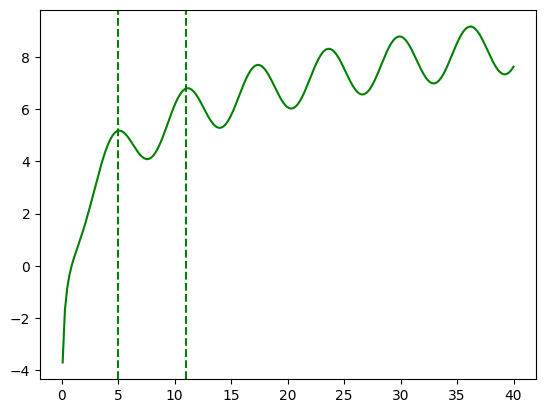

In [ ]:
f = lambda x : np.log(x**2) + 1 - np.sin(x)
x = np.linspace(0.1, 40, 200)
plt.plot(x, f(x), color = "green")
plt.axvline(x = 5, linestyle =  "--", label = "5", color = "green")
plt.axvline(x = 11, linestyle =  "--", label = "11", color = "green")
plt.savefig("concrete_problem")
print("Метод дихотомии:                ", dichotomy_method(0.01, f, 5, 10))
print("Метод золотого сечения:         ", golden_ratio_method(0.01, f, 5, 10))
print("Метод фибоначчи:                ", method_fibonacci(0.01, f, 5, 10))
print("Метод парабол:                  ", parabola_method(0.01, f, 5, 10))
print("Комбинированный метод Брента:   ", combined_brent_method(0.01, f, 5, 10))

#### Сравнение эффективности методов

In [ ]:
def show_efficacy(eps, y, a, b):
# получаем список количества вызовов функции и итераций для различной точности eps
  dichotomy_array = np.array(list(map(lambda eps: dichotomy_method(eps, y, a, b)[1], eps)))
# делим список пар этих значений на два отдельных списка
  number_of_iterations, number_of_func_count = zip(*dichotomy_array)

  fig, (ax) =  plt.subplots(nrows = 1, ncols = 2)
  fig.set_figwidth(7)
  fig.set_figheight(3)
  fig.suptitle("Метод дихотомии", fontsize = 10)
  ax[0].plot(eps, number_of_iterations)
  ax[0].set_title("Количество итераций", fontsize = 9)
  ax[1].plot(eps, number_of_func_count)
  ax[1].set_title("Количество вычислений значений функции", fontsize = 9)
  fig.savefig("dichotomy")

# получаем список количества вызовов функции и итераций для различной точности eps
  golden_ratio_array = np.array(list(map(lambda eps: golden_ratio_method(eps, y, a, b)[1], eps)))
# делим список пар этих значений на два отдельных списка
  number_of_iterations, number_of_func_count = zip(*golden_ratio_array)

  fig, (ax) =  plt.subplots(nrows = 1, ncols = 2)
  fig.set_figwidth(7)
  fig.set_figheight(3)
  fig.suptitle("Метод золотого сечения", fontsize = 10)
  ax[0].plot(eps, number_of_iterations)
  ax[0].set_title("Количество итераций", fontsize = 9)
  ax[1].plot(eps, number_of_func_count)
  ax[1].set_title("Количество вычислений значений функции", fontsize = 9)
  fig.savefig("golden_ratio")

# получаем список количества вызовов функции и итераций для различной точности eps
  fibonacci_array = np.array(list(map(lambda eps: method_fibonacci(eps, y, a, b)[1], eps)))
# делим список пар этих значений на два отдельных списка
  number_of_iterations, number_of_func_count = zip(*fibonacci_array)

  fig, (ax) =  plt.subplots(nrows = 1, ncols = 2)
  fig.set_figwidth(7)
  fig.set_figheight(3)
  fig.suptitle("Метод Фибоначчи", fontsize = 10)
  ax[0].plot(eps, number_of_iterations)
  ax[0].set_title("Количество итераций", fontsize = 9)
  ax[1].plot(eps, number_of_func_count)
  ax[1].set_title("Количество вычислений значений функции", fontsize = 9)
  fig.savefig("fibonacci")

# получаем список количества вызовов функции и итераций для различной точности eps
  parabola_array = np.array(list(map(lambda eps: parabola_method(eps, y, a, b)[1], eps)))
# делим список пар этих значений на два отдельных списка
  number_of_iterations, number_of_func_count = zip(*parabola_array)

  fig, (ax) =  plt.subplots(nrows = 1, ncols = 2)
  fig.set_figwidth(7)
  fig.set_figheight(3)
  fig.suptitle("Метод парабол", fontsize = 10)
  ax[0].plot(eps, number_of_iterations)
  ax[0].set_title("Количество итераций", fontsize = 9)
  ax[1].plot(eps, number_of_func_count)
  ax[1].set_title("Количество вычислений значений функции", fontsize = 9)
  fig.savefig("parabola")

# получаем список количества вызовов функции и итераций для различной точности eps
  combined_brent_array = np.array(list(map(lambda eps: combined_brent_method(eps, y, a, b)[1], eps)))
# делим список пар этих значений на два отдельных списка
  number_of_iterations, number_of_func_count = zip(*combined_brent_array)

  fig, (ax) =  plt.subplots(nrows = 1, ncols = 2)
  fig.set_figwidth(7)
  fig.set_figheight(3)
  fig.suptitle("Комбинированный метод Брента", fontsize = 10)
  ax[0].plot(eps, number_of_iterations)
  ax[0].set_title("Количество итераций", fontsize = 9)
  ax[1].plot(eps, number_of_func_count)
  ax[1].set_title("Количество вычислений значений функции", fontsize = 9)
  fig.savefig("brent")


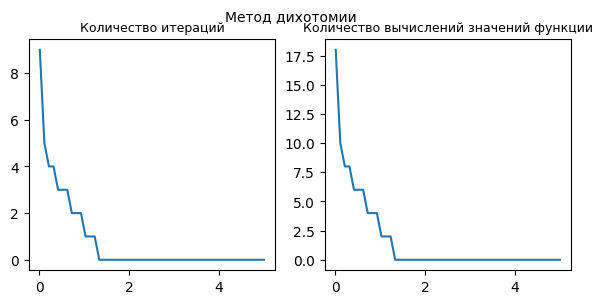

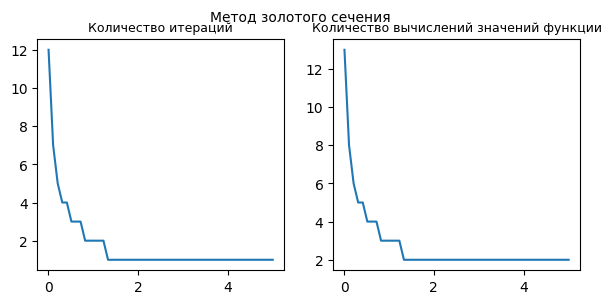

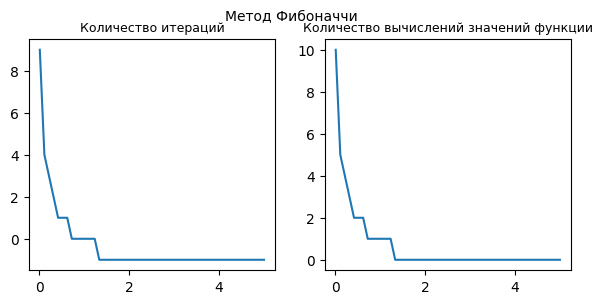

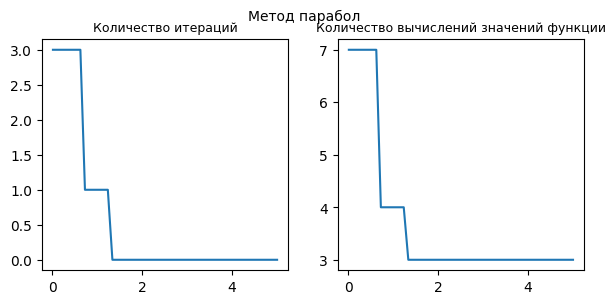

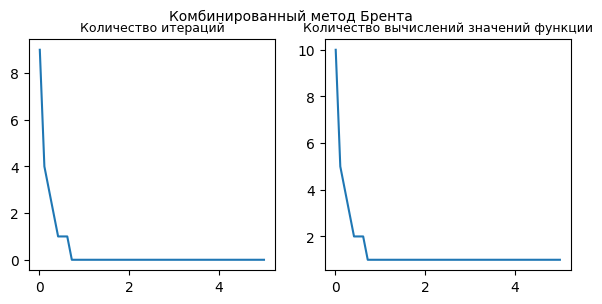

In [ ]:
f = lambda x : x**2
eps = np.linspace(0.01, 5)

show_efficacy(eps, f,  2 * np.pi - 0.25, 2 * np.pi + 1)

#### Тестирование реализаций на унимодальных функциях

1:   ((-2.505428059895834, -2.4958333333333336), (12, 24))
2:   ((6.273453934145482, 6.283185307179586), (11, 22))
3:   ((1.767864583333333, 1.7764583333333333), (8, 16))
4:   ((-0.0033333333333333335, 0.0033333333333333335), (1, 2))
5:   ((2.993880208333333, 3.0034700520833333), (10, 20))
6:   ((9.193750000000001, 9.202317708333336), (11, 22))


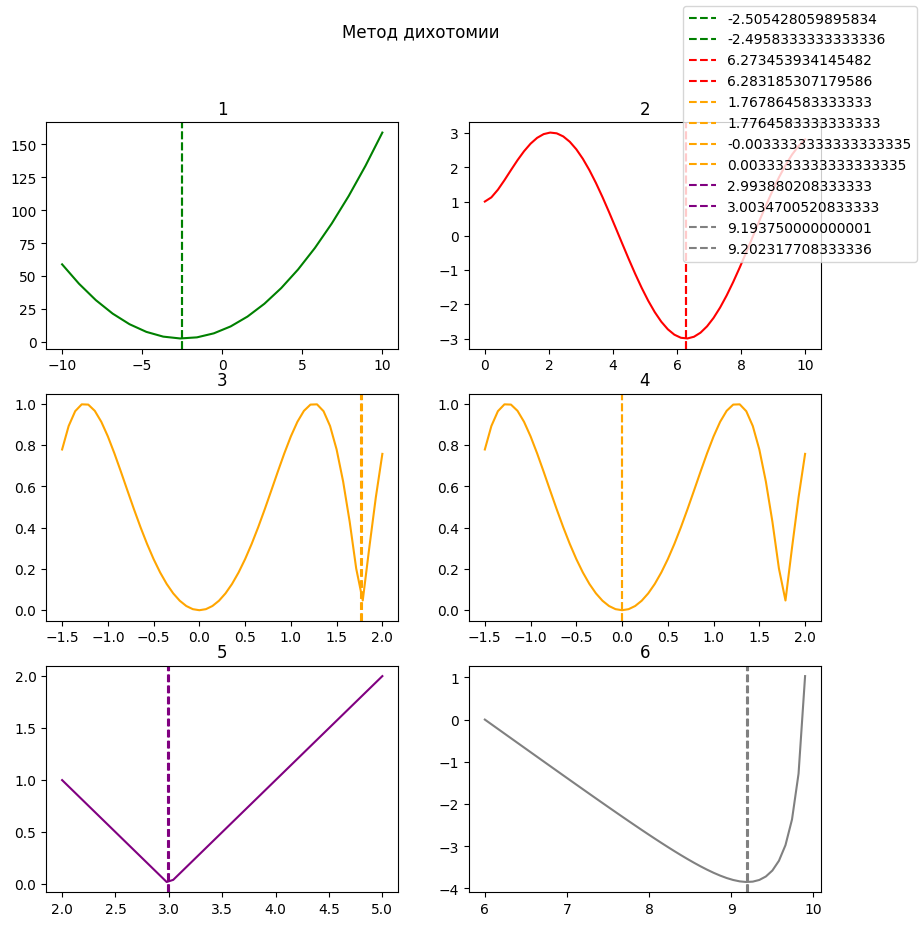

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Метод дихотомии")

f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
x_min = dichotomy_method(0.01, f, -7, 5)
print("1:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "green")
ax1[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "green")
ax1[0].set_title("1")

f = lambda x : 3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
x_min = dichotomy_method(0.01, f, 0, 2 * np.pi)
print("2:  ", x_min)
ax1[1].plot(x, f(x), color = "red")
ax1[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax1[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax1[1].set_title("2")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = dichotomy_method(0.01, f, 1.5, 2.0)
print("3:  ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[0].set_title("3")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = dichotomy_method(0.01, f, -1.5, 1.5)
print("4:  ", x_min)
ax2[1].plot(x, f(x), color = "orange")
ax2[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[1].set_title("4")

f = lambda x : abs(x - 3)
x = np.linspace(2, 5)
x_min = dichotomy_method(0.01, f, 2, 5)
print("5:  ", x_min)
ax3[0].plot(x, f(x), color = "purple")
ax3[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "purple")
ax3[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "purple")
ax3[0].set_title("5")

f = lambda x : -np.log(x - 2)**2 + np.log(10 - x)**2
x = np.linspace(6, 9.9)
x_min = dichotomy_method(0.01, f, 6, 9.9)
print("6:  ", x_min)
ax3[1].plot(x, f(x), color = "grey")
ax3[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "grey")
ax3[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "grey")
ax3[1].set_title("6")

fig.legend()
fig.savefig("dichotomy_test")

1:   ((-2.5018172378515047, -2.49637999160673), (10, 11))
2:   ((6.275731933337633, 6.283185307179586), (15, 16))
3:   ((1.7679973318781004, 1.7745751406263137), (7, 8))
4:   ((-0.001099706153835811, 0.0046584300227010544), (10, 11))
5:   ((2.997347483838597, 3.003105620015134), (9, 10))
6:   ((9.19490733372476, 9.199533674754203), (10, 11))


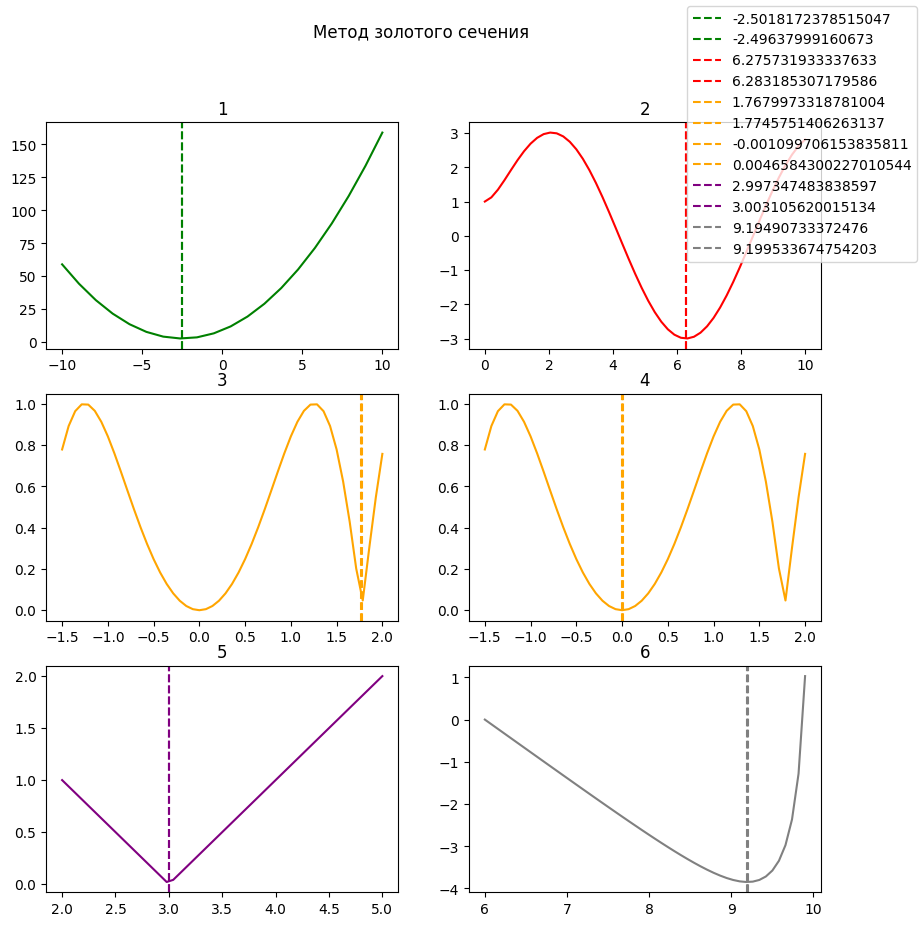

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Метод золотого сечения")

f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
x_min = golden_ratio_method(0.01, f, -7, 5)
print("1:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "green")
ax1[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "green")
ax1[0].set_title("1")

f = lambda x : 3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
x_min = golden_ratio_method(0.01, f, 0, 2 * np.pi)
print("2:  ", x_min)
ax1[1].plot(x, f(x), color = "red")
ax1[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax1[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax1[1].set_title("2")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = golden_ratio_method(0.01, f, 1.5, 2.0)
print("3:  ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[0].set_title("3")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = golden_ratio_method(0.01, f, -1.5, 1.5)
print("4:  ", x_min)
ax2[1].plot(x, f(x), color = "orange")
ax2[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[1].set_title("4")

f = lambda x : abs(x - 3)
x = np.linspace(2, 5)
x_min = golden_ratio_method(0.01, f, 2, 5)
print("5:  ", x_min)
ax3[0].plot(x, f(x), color = "purple")
ax3[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "purple")
ax3[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "purple")
ax3[0].set_title("5")

f = lambda x : -np.log(x - 2)**2 + np.log(10 - x)**2
x = np.linspace(6, 9.9)
x_min = golden_ratio_method(0.01, f, 6, 9.9)
print("6:  ", x_min)
ax3[1].plot(x, f(x), color = "grey")
ax3[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "grey")
ax3[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "grey")
ax3[1].set_title("6")

fig.legend()
fig.savefig("golden_ratio_test")

1:   ((-2.5001163781515805, -2.499929136606766), (14, 15))
2:   ((6.26408747949819, 6.283185307179586), (13, 14))
3:   ((1.7694638694638696, 1.7811188811188812), (7, 8))
4:   ((-0.001568853241623922, 0.00457087341927994), (11, 12))
5:   ((2.99954850710396, 3.000914895744551), (11, 12))
6:   ((9.197279284649778, 9.198395230998509), (12, 13))


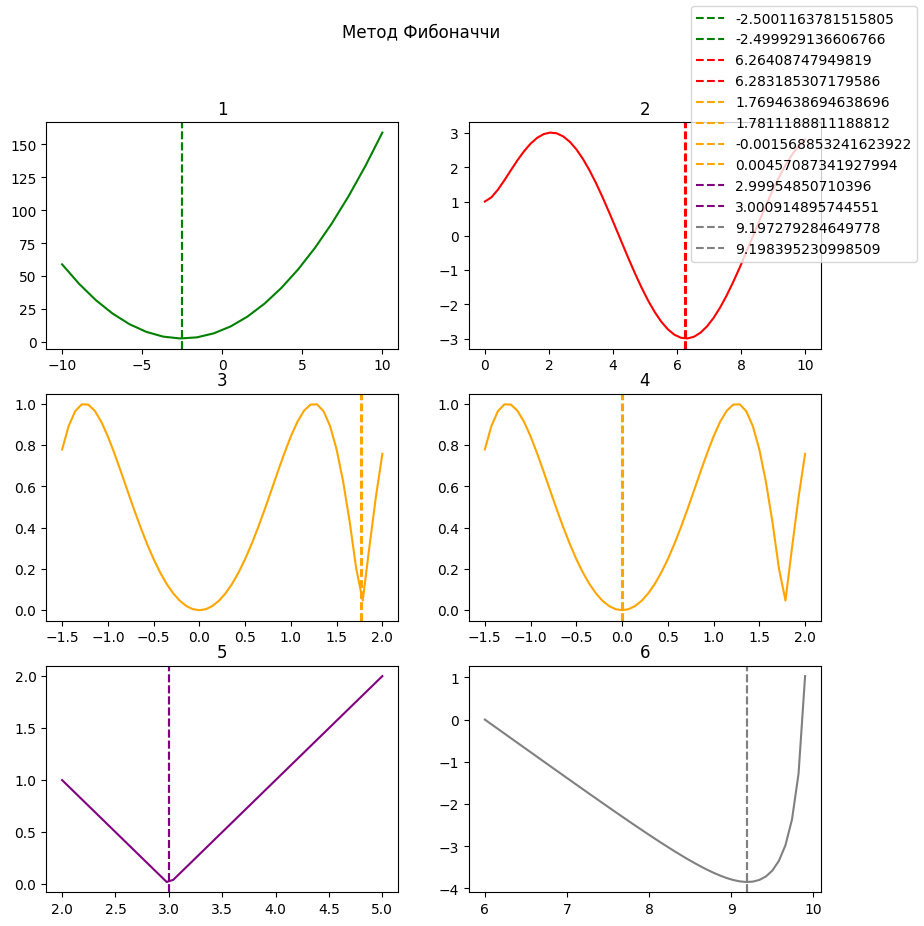

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Метод Фибоначчи")

f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
x_min = method_fibonacci(0.01, f, -7, 5)
print("1:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "green")
ax1[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "green")
ax1[0].set_title("1")

f = lambda x : 3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
x_min = method_fibonacci(0.01, f, 0, 2 * np.pi)
print("2:  ", x_min)
ax1[1].plot(x, f(x), color = "red")
ax1[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax1[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax1[1].set_title("2")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = method_fibonacci(0.01, f, 1.5, 2.0)
print("3:  ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[0].set_title("3")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = method_fibonacci(0.01, f, -1.5, 1.5)
print("4:  ", x_min)
ax2[1].plot(x, f(x), color = "orange")
ax2[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[1].set_title("4")

f = lambda x : abs(x - 3)
x = np.linspace(2, 5)
x_min = method_fibonacci(0.01, f, 2, 5)
print("5:  ", x_min)
ax3[0].plot(x, f(x), color = "purple")
ax3[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "purple")
ax3[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "purple")
ax3[0].set_title("5")

f = lambda x : -np.log(x - 2)**2 + np.log(10 - x)**2
x = np.linspace(6, 9.9)
x_min = method_fibonacci(0.01, f, 6, 9.9)
print("6:  ", x_min)
ax3[1].plot(x, f(x), color = "grey")
ax3[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "grey")
ax3[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "grey")
ax3[1].set_title("6")

fig.legend()
fig.savefig("fibonacci_test")

1:   ((-2.5, -2.5), (2, 6))
2:   ((6.283189409998981, 6.2833499855146036), (10, 13))
3:   ((1.7693268544636078, 1.7759236913930003), (6, 9))
4:   ((0.0, 0.0), (1, 5))
5:   ((2.9964261394130944, 3.0030517578125), (7, 10))
6:   ((9.19752736709135, 9.197527368462104), (121, 125))


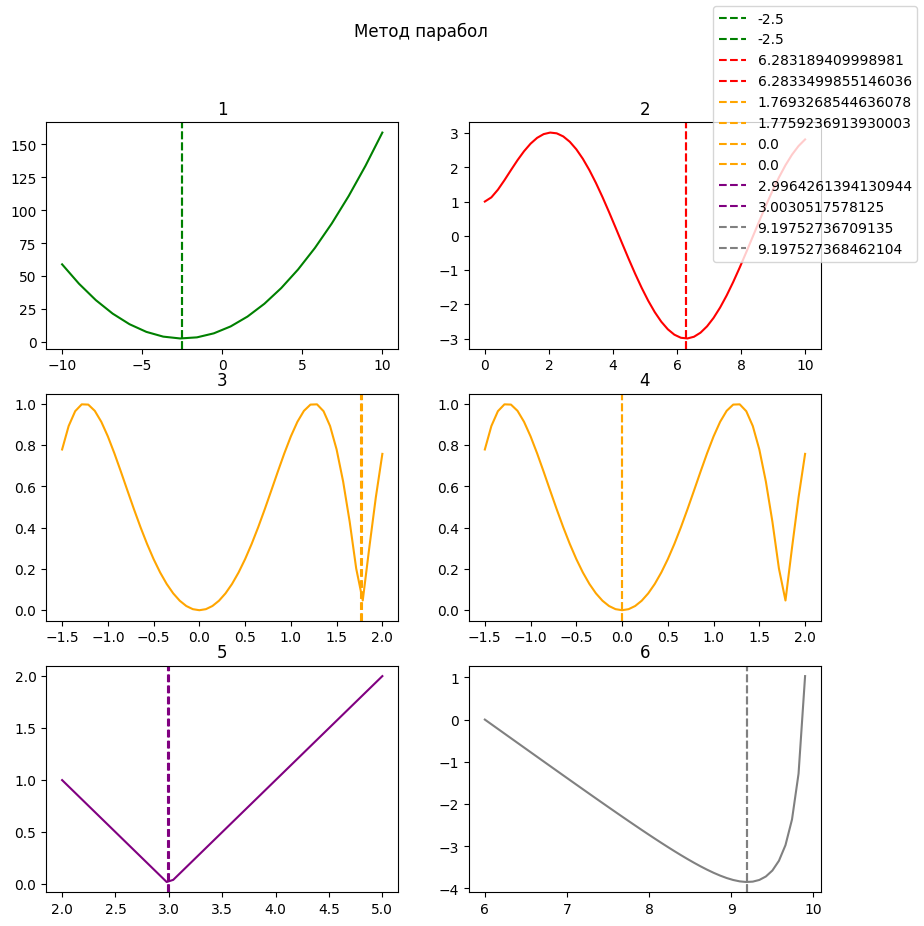

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Метод парабол")

f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
x_min = parabola_method(0.01, f, -7, 5)
print("1:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "green")
ax1[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "green")
ax1[0].set_title("1")

f = lambda x : 3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
x_min = parabola_method(0.01, f, 0, 2 * np.pi + 1)
print("2:  ", x_min)
ax1[1].plot(x, f(x), color = "red")
ax1[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax1[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax1[1].set_title("2")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = parabola_method(0.01, f, 1.5, 2.0)
print("3:  ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[0].set_title("3")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = parabola_method(0.01, f, -1.5, 1.5)
print("4:  ", x_min)
ax2[1].plot(x, f(x), color = "orange")
ax2[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[1].set_title("4")

f = lambda x : abs(x - 3)
x = np.linspace(2, 5)
x_min = parabola_method(0.01, f, 2, 5)
print("5:  ", x_min)
ax3[0].plot(x, f(x), color = "purple")
ax3[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "purple")
ax3[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "purple")
ax3[0].set_title("5")

f = lambda x : -np.log(x - 2)**2 + np.log(10 - x)**2
x = np.linspace(6, 9.9)
x_min = parabola_method(0.01, f, 6, 9.9)
print("6:  ", x_min)
ax3[1].plot(x, f(x), color = "grey")
ax3[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "grey")
ax3[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "grey")
ax3[1].set_title("6")

fig.legend()
fig.savefig("parabola_test")

1:   (-2.5000000000000178, (11, 12))
2:   (6.279799694483297, (14, 15))
3:   (1.7701694461959347, (7, 8))
4:   (0.0, (8, 9))
5:   (3.0013587087566247, (11, 12))
6:   (9.199157731060383, (12, 13))


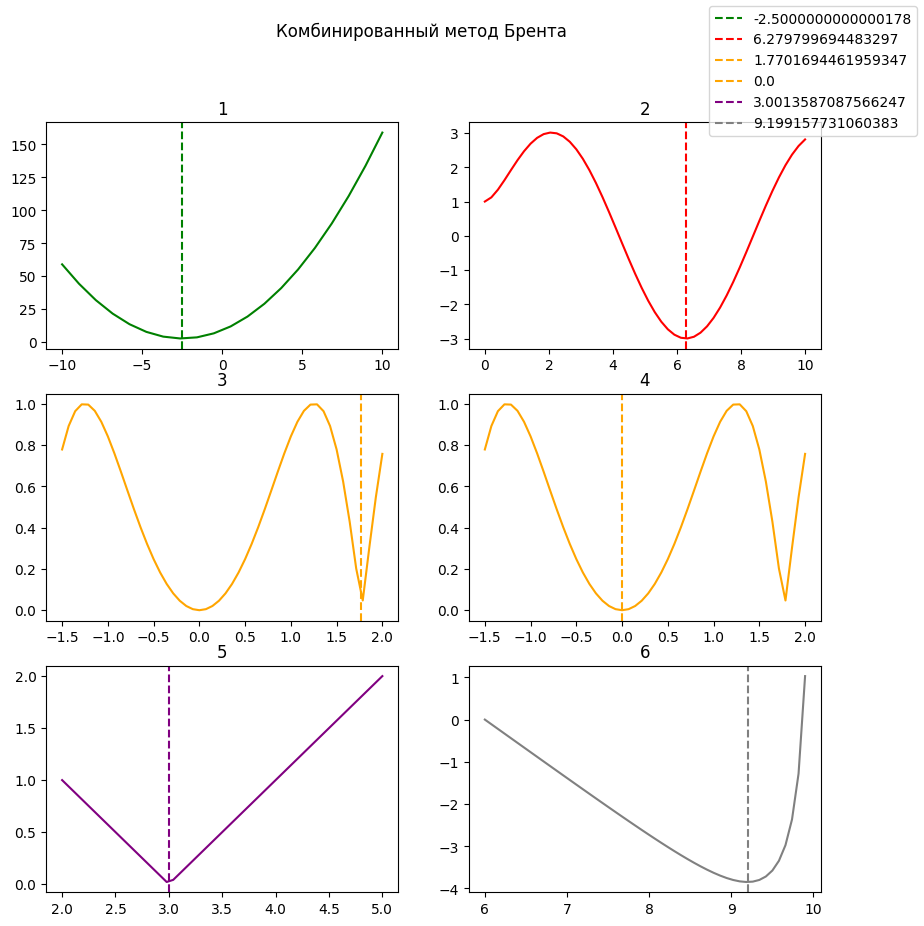

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Комбинированный метод Брента")

f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
x_min = combined_brent_method(0.01, f, -7, 5)
print("1:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "green")
ax1[0].set_title("1")

f = lambda x : 3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
x_min = combined_brent_method(0.01, f, 0, 2 * np.pi + 1)
print("2:  ", x_min)
ax1[1].plot(x, f(x), color = "red")
ax1[1].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "red")
ax1[1].set_title("2")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = combined_brent_method(0.01, f, 1.5, 2.0)
print("3:  ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "orange")
ax2[0].set_title("3")

f = lambda x : abs(np.sin(x**2))
x = np.linspace(-1.5, 2.0)
x_min = combined_brent_method(0.01, f, -1.5, 1.5)
print("4:  ", x_min)
ax2[1].plot(x, f(x), color = "orange")
ax2[1].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "orange")
ax2[1].set_title("4")

f = lambda x : abs(x - 3)
x = np.linspace(2, 5)
x_min = combined_brent_method(0.01, f, 2, 5)
print("5:  ", x_min)
ax3[0].plot(x, f(x), color = "purple")
ax3[0].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "purple")
ax3[0].set_title("5")

f = lambda x : -np.log(x - 2)**2 + np.log(10 - x)**2
x = np.linspace(6, 9.9)
x_min = combined_brent_method(0.01, f, 6, 9.9)
print("6:  ", x_min)
ax3[1].plot(x, f(x), color = "grey")
ax3[1].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "grey")
ax3[1].set_title("6")

fig.legend()
fig.savefig("combined_brent_test")

#### Тестирование на многомодальных функциях

Метод дихотомии:   ((-0.0033333333333333335, 0.0033333333333333335), (1, 2))
Метод золотого сечения:   ((1.5325224750231214, 1.5421193686506829), (10, 11))
Метод Фибоначчи:      ((1.533714560940522, 1.5361225002833452), (12, 13))
Метод парабол:   ((-0.0, 0.0), (1, 5))
Комбинированный метод Брента:   (0.0, (8, 9))


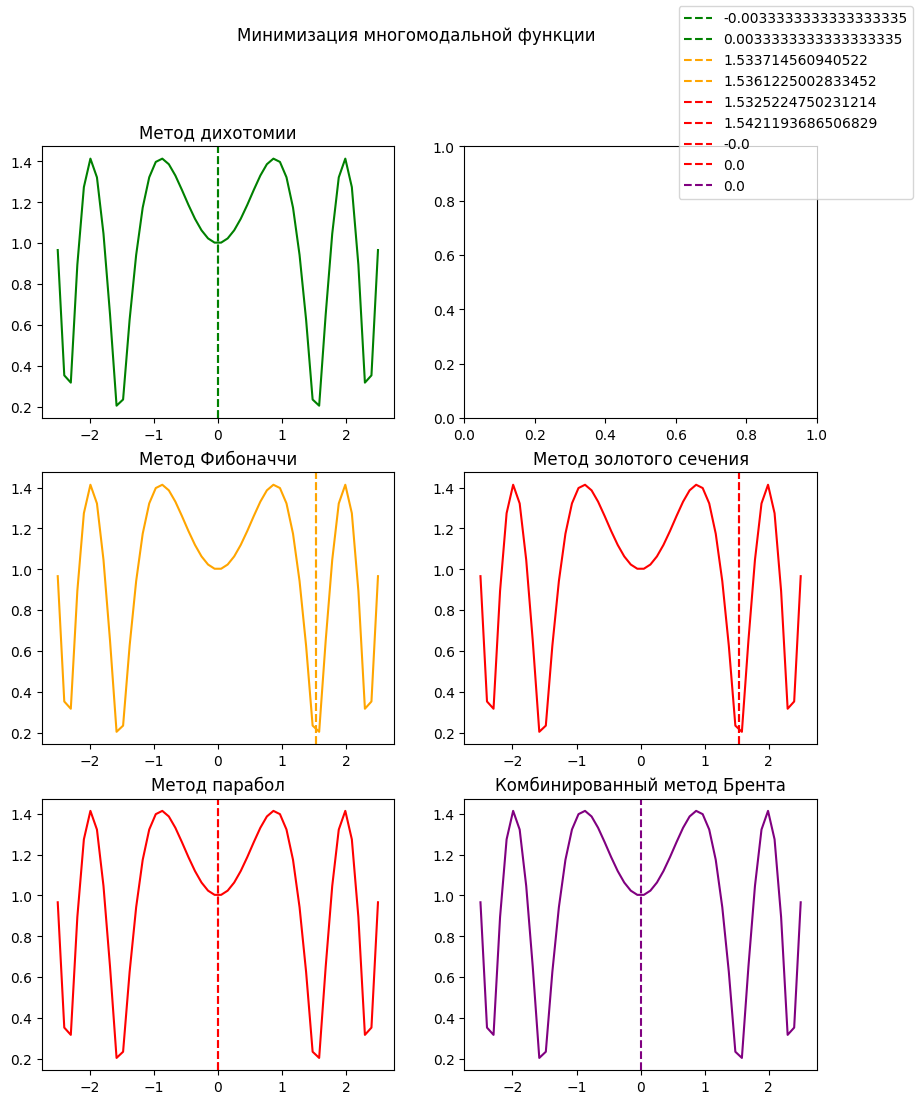

In [ ]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(10)
fig.set_figheight(12)
fig.suptitle("Минимизация многомодальной функции")

f = lambda x : abs(np.sin(x**2) + np.cos(x**2))
x = np.linspace(-2.5, 2.5)
x_min = dichotomy_method(0.01, f, -2.5, 2.5)
print("Метод дихотомии:  ", x_min)
ax1[0].plot(x, f(x), color = "green")
ax1[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "green")
ax1[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "green")
ax1[0].set_title("Метод дихотомии")

f = lambda x : abs(np.sin(x**2) + np.cos(x**2))
x = np.linspace(-2.5, 2.5)
x_min = golden_ratio_method(0.01, f, -2.5, 2.5)
print("Метод золотого сечения:  ", x_min)
ax2[1].plot(x, f(x), color = "red")
ax2[1].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax2[1].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax2[1].set_title("Метод золотого сечения")

f = lambda x : abs(np.sin(x**2) + np.cos(x**2))
x = np.linspace(-2.5, 2.5)
x_min = method_fibonacci(0.01, f, -2.5, 2.5)
print("Метод Фибоначчи:     ", x_min)
ax2[0].plot(x, f(x), color = "orange")
ax2[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "orange")
ax2[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "orange")
ax2[0].set_title("Метод Фибоначчи")

f = lambda x : abs(np.sin(x**2) + np.cos(x**2))
x = np.linspace(-2.5, 2.5)
x_min = parabola_method(0.01, f, -2.5, 2.5)
print("Метод парабол:  ", x_min)
ax3[0].plot(x, f(x), color = "red")
ax3[0].axvline(x = x_min[0][0], linestyle =  "--", label = x_min[0][0], color = "red")
ax3[0].axvline(x = x_min[0][1], linestyle =  "--", label = x_min[0][1], color = "red")
ax3[0].set_title("Метод парабол")

f = lambda x : abs(np.sin(x**2) + np.cos(x**2))
x = np.linspace(-2.5, 2.5)
x_min = combined_brent_method(0.01, f, -2.5, 2.5)
print("Комбинированный метод Брента:  ", x_min)
ax3[1].plot(x, f(x), color = "purple")
ax3[1].axvline(x = x_min[0], linestyle =  "--", label = x_min[0], color = "purple")
ax3[1].set_title("Комбинированный метод Брента")

fig.legend()
fig.savefig("plural_model_test")

#### Тестирование всех методов на одной функции

Метод дихотомии:                 ((53.520833333333336, 54.49479166666667), (7, 14))
Метод золотого сечения:          ((53.57574154982764, 54.42719099991592), (6, 7))
Метод фибоначчи:                 ((53.7711229946524, 54.104812834224596), (7, 8))
Метод парабол:                   ((53.920913559519406, 53.92091357285157), (14, 18))
Комбинированный метод Брента:    (54.16407864998738, (7, 8))


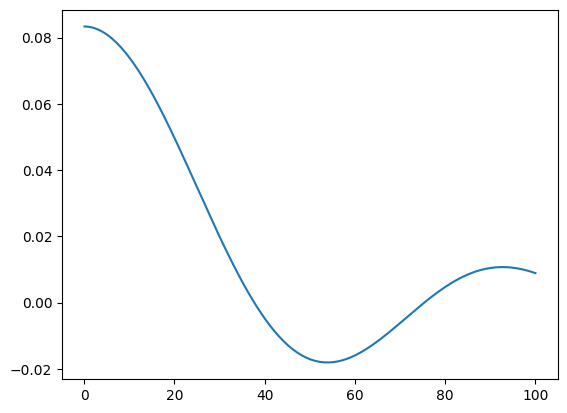

In [ ]:
f = lambda x : np.sin(x/12)/x
x = np.linspace(0.1, 100, 200)
plt.plot(x, f(x))

print("Метод дихотомии:                ", dichotomy_method(1, f, 40, 80))
print("Метод золотого сечения:         ", golden_ratio_method(1, f, 40, 80))
print("Метод фибоначчи:                ", method_fibonacci(1, f, 40, 80))
print("Метод парабол:                  ", parabola_method(1, f, 40, 80))
print("Комбинированный метод Брента:   ", combined_brent_method(1, f, 40, 80))

Метод дихотомии:                ((-2.5483072916666663, -2.4583333333333335), (9, 18))
Метод золотого сечения:         ((-2.5370078347742506, -2.4767078498864947), (7, 8))
Метод фибоначчи:                ((-2.506625224386676, -2.4917857855195797), (9, 10))
Метод парабол:                  ((-2.5, -2.5), (2, 6))
Комбинированный метод Брента:   (-2.4999999999999996, (7, 8))


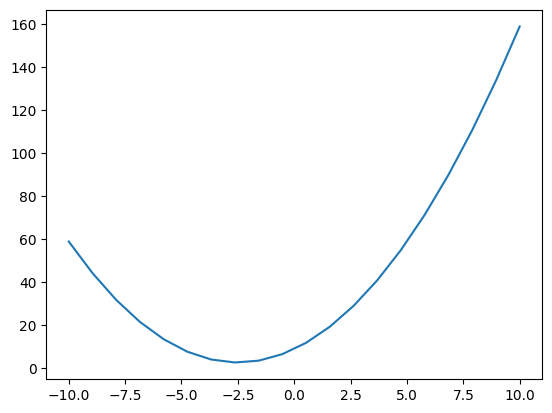

In [ ]:
f = lambda x : x*x + 5*x + 9
x = np.linspace(-10, 10, 20)
plt.plot(x, f(x))

print("Метод дихотомии:               ", dichotomy_method(0.1, f, -7, 5))
print("Метод золотого сечения:        ", golden_ratio_method(0.1, f, -7, 5))
print("Метод фибоначчи:               ", method_fibonacci(0.1, f, -7, 5))
print("Метод парабол:                 ", parabola_method(0.1, f, -7, 5))
print("Комбинированный метод Брента:  ", combined_brent_method(0.1, f, -7, 5))

Метод дихотомии:                ((2.064078454857805, 2.1550283974639752), (8, 16))
Метод золотого сечения:         ((2.0813863116940072, 2.1324724959986088), (7, 8))
Метод фибоначчи:                ((2.1006384264773756, 2.1336381780950484), (8, 9))
Метод парабол:                  ((2.111755096724365, 2.111755167613878), (12, 15))
Комбинированный метод Брента:   (2.1126963672077346, (7, 8))


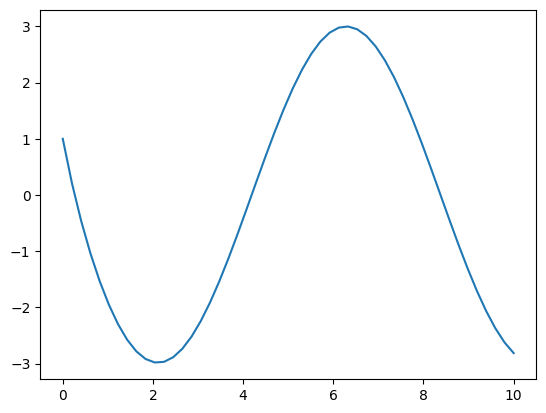

In [ ]:
f = lambda x : -3 * np.sin(0.75 * x) + np.e ** (-2 * x)
x = np.linspace(0, 10)
plt.plot(x, f(x))

print("Метод дихотомии:               ", dichotomy_method(0.1, f, 0, 2 * np.pi))
print("Метод золотого сечения:        ", golden_ratio_method(0.1, f, 0, 2 * np.pi))
print("Метод фибоначчи:               ", method_fibonacci(0.1, f, 0, 2 * np.pi))
print("Метод парабол:                 ", parabola_method(0.1, f, 0, 2 * np.pi))
print("Комбинированный метод Брента:  ", combined_brent_method(0.1, f, 0, 2 * np.pi))

Метод дихотомии:                ((1.767864583333333, 1.7764583333333333), (8, 16))
Метод золотого сечения:         ((1.7679973318781004, 1.7745751406263137), (7, 8))
Метод фибоначчи:                ((1.7694638694638696, 1.7811188811188812), (7, 8))
Метод парабол:                  ((1.7693268544636078, 1.7759236913930003), (6, 9))
Комбинированный метод Брента:   (1.7701694461959347, (7, 8))


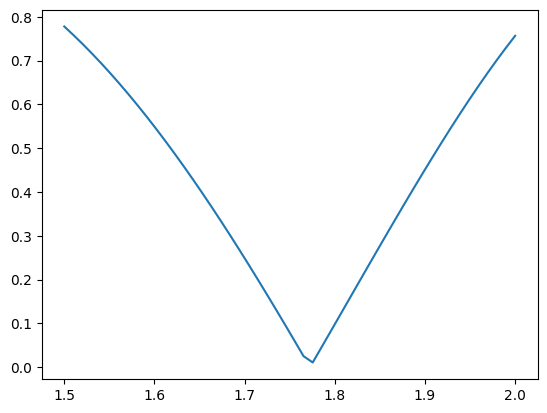

In [ ]:
f = lambda x : np.abs(np.sin(x**2))
x = np.linspace(1.5, 2.0)
plt.plot(x, f(x))

print("Метод дихотомии:               ", dichotomy_method(0.01, f, 1.5, 2.0))
print("Метод золотого сечения:        ", golden_ratio_method(0.01, f, 1.5, 2.0))
print("Метод фибоначчи:               ", method_fibonacci(0.01, f, 1.5, 2.0))
print("Метод парабол:                 ", parabola_method(0.01, f, 1.5, 2.0))
print("Комбинированный метод Брента:  ", combined_brent_method(0.01, f, 1.5, 2.0))

Метод дихотомии:                ((2.466666666666667, 2.5541666666666667), (4, 8))
Метод золотого сечения:         ((2.4888543819998317, 2.547213595499958), (4, 5))
Метод фибоначчи:                ((2.46, 2.7), (2, 3))
Метод парабол:                  ((2.4995444646478875, 2.555070099658443), (2, 5))
Комбинированный метод Брента:   (2.5, (2, 3))


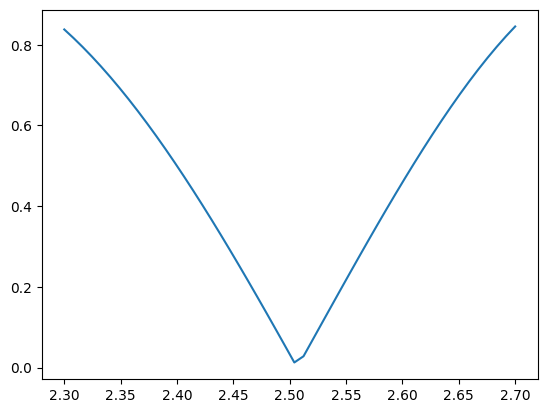

In [ ]:
f = lambda x : np.abs(np.sin(x**2))
x = np.linspace(2.3, 2.7)
plt.plot(x, f(x))

print("Метод дихотомии:               ", dichotomy_method(0.1, f, 2.3, 2.7))
print("Метод золотого сечения:        ", golden_ratio_method(0.1, f, 2.3, 2.7))
print("Метод фибоначчи:               ", method_fibonacci(0.1, f, 2.3, 2.7))
print("Метод парабол:                 ", parabola_method(0.1, f, 2.3, 2.7))
print("Комбинированный метод Брента:  ", combined_brent_method(0.1, f, 2.3, 2.7))

Метод дихотомии:                ((2.993880208333333, 3.0034700520833333), (10, 20))
Метод золотого сечения:         ((2.997347483838597, 3.003105620015134), (9, 10))
Метод фибоначчи:                ((2.99954850710396, 3.000914895744551), (11, 12))
Метод парабол:                  ((2.9964261394130944, 3.0030517578125), (7, 10))
Комбинированный метод Брента:   (3.0013587087566247, (11, 12))


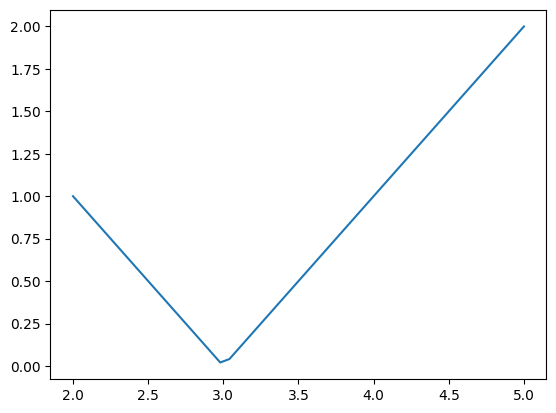

In [ ]:
f = lambda x : np.abs(x - 3)
x = np.linspace(2, 5)
plt.plot(x, f(x))
print("Метод дихотомии:               ", dichotomy_method(0.01, f, 2, 5))
print("Метод золотого сечения:        ", golden_ratio_method(0.01, f, 2, 5))
print("Метод фибоначчи:               ", method_fibonacci(0.01, f, 2, 5))
print("Метод парабол:                 ", parabola_method(0.01, f, 2, 5))
print("Комбинированный метод Брента:  ", combined_brent_method(0.01, f, 2, 5))